In [6]:
import warnings
warnings.filterwarnings('ignore')

## Business Purpose

The price of oil india is contiously increasing and it has become difficult to predict what the prices changes will be over next few months.

In this project we will try to forecast the different petrol prices for the upcoming dates given to us.

We will use LSTM and ARMA forecasting models to predict the prices then we will see how we implement the same using Auto Keras, which is an Auto ML library.

## LSTM

Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning.  Unlike standard feedfoward neural networks, LSTM has feedback connections.  It can process not only sing data points, but also entire sequences of data

## ARMIA

An ARIMA model is class of statistical models for analyzing and forecasting time series data.  ARIMA is an acroynm that stands for Auto Regressive Integrated Moving Average.  It is a generalization of the simpler Auto Regressive Moving Average and adds the notion of integration.

## Steps of the Project

*  Data Analysis
*  Model Building and predictions using ML techniques
*  Model Building and predictions using Auto Keras(Auto ML)



## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


## Data Analysis

In [11]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [4]:
df2 = df1.dropna()

In [8]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


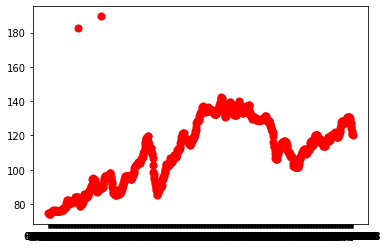

In [9]:
plt.scatter(df2.Date, df2.Petrol, color = 'red', label='Prices', s=50)

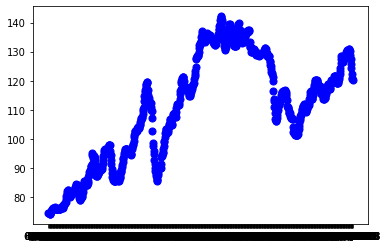

In [10]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol, color = 'blue', label='Prices', s=50)

In [12]:
df4 = df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df4 = scaler.fit_transform(np.array(df4).reshape(-1,1))

In [15]:
training_size = int(len(df4) * 0.65)
test_size=len(df4) - training_size
train_data, test_data = df4[0:training_size,:], df4[training_size:len(df4),:1]

In [17]:
training_size
print(test_size)
print(train_data.shape)
print(test_data.shape)

284
(525, 1)
(284, 1)


## Data Preprocessing

In [50]:
import numpy
# convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [51]:
# reshape into x=t, t+1, t+2, t+3 and y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

## LSTM Model

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 10s 426ms/step - loss: 0.1868 - val_loss: 0.0720
Epoch 2/100
7/7 [==============================] - 1s 203ms/step - loss: 0.0338 - val_loss: 0.0171
Epoch 3/100
7/7 [==============================] - 1s 202ms/step - loss: 0.0252 - val_loss: 0.0045
Epoch 4/100
7/7 [==============================] - 1s 203ms/step - loss: 0.0131 - val_loss: 0.0108
Epoch 5/100
7/7 [==============================] - 2s 384ms/step - loss: 0.0097 - val_loss: 0.0054
Epoch 6/100
7/7 [==============================] - 3s 329ms/step - loss: 0.0085 - val_loss: 0.0049
Epoch 7/100
7/7 [==============================] - 1s 203ms/step - loss: 0.0071 - val_loss: 0.0034
Epoch 8/100
7/7 [==============================] - 1s 203ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 9/100
7/7 [==============================] - 1s 203ms/step - loss: 0.0060 - val_loss: 0.0036
Epoch 10/100
7/7 [==============================] - 1s 202ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 11

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 34ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

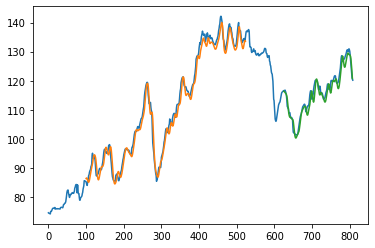

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
df_test=pd.read_csv("/content/drive/MyDrive/test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [34]:
model.save("prtrol price prediction")

## Using ARIMA

In [35]:
!pip install --upgrade patsy
!pip install statsmodels
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 13.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
df = pd.read_csv("/content/drive/MyDrive/train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [38]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [39]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [40]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [41]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670595, 119.52143347, 119.30634688, 119.14818591,
       119.02925477, 118.93899198, 118.87071704, 118.81917609,
       118.78030427, 118.75097698, 118.72884   , 118.71212989,
       118.69951735, 118.68999809, 118.68281349, 118.67739086,
       118.67329807, 118.67020899, 118.66787748, 118.66611776,
       118.66478959, 118.66378715, 118.66303054, 118.66245949,
       118.66202848, 118.66170317, 118.66145764, 118.66127233,
       118.66113246, 118.66102689])

## Auto Keras

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
!pip install autokeras
!pip show autokeras

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak
from sklearn.metrics import mean_squared_error

In [48]:
reg = ak.StructuredDataRegressor(overwrite=True, max_trials=3)

In [ ]:
reg.fit(x=X_train, y=y_train, verbose=0)

In [54]:
# evaluate the model
mae, _  = reg.evaluate(X_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()

6/6 [==============================] - 0s 5ms/step


In [55]:
# summarize the loaded model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 100)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 100)              201       
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [56]:
yhat_train= reg.predict(X_train)

14/14 [==============================] - 0s 7ms/step


In [57]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yhat_test)
mean_squared_error(y_train,yhat_train)

0.011392708581101921